In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats, signal
from scipy import fft

In [25]:
data = pd.read_csv("data__1_.csv")

In [26]:
data

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0.004810,0.0717,0.0073,-0.0041,0.072
1,0.005495,0.1182,-0.0615,0.0380,0.139
2,0.005909,0.1218,-0.0633,0.1131,0.178
3,0.006285,0.0778,-0.0080,0.0759,0.109
4,0.015850,0.0272,-0.0056,0.0438,0.052
...,...,...,...,...,...
43937,221.207737,0.1638,-0.1303,0.3099,0.374
43938,221.210373,0.2130,-0.1345,-0.3669,0.445
43939,221.215323,0.2621,-0.1871,-0.8219,0.883
43940,221.220376,0.1885,-0.2031,-1.0125,1.050


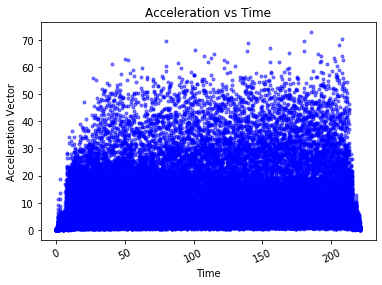

In [27]:
# plot the vector of the total acceleration against time
f =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], data['aT (m/s^2)'],'b.', alpha=0.5) 
plt.xlabel('Time')
plt.ylabel('Acceleration Vector')
plt.title('Acceleration vs Time')
#plt.legend()
plt.show()
#f.savefig("figure1.png")

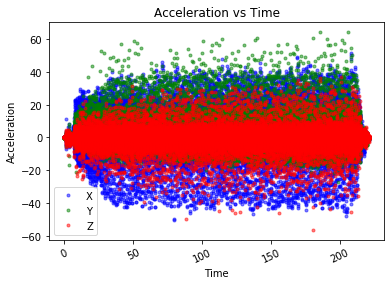

In [28]:
# plot of accelerations in x, y, and z direction
f1 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], data['ax (m/s^2)'],'b.', alpha=0.5, label="X") 
plt.plot(data['time'], data['ay (m/s^2)'],'g.', alpha=0.5, label="Y") 
plt.plot(data['time'], data['az (m/s^2)'],'r.', alpha=0.5, label="Z") 
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration vs Time')
plt.legend()
plt.show()
#f1.savefig("figure1.png")

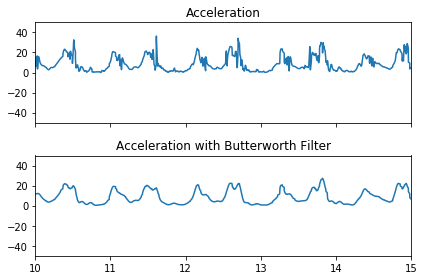

In [30]:
# Low-pass Buttermore filter to get rid of high frequency random noise
b,a = signal.butter(3, 0.1, btype='lowpass', analog=False)
low_pass = signal.filtfilt(b, a, data['aT (m/s^2)'])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(data['time'], data['aT (m/s^2)'])
ax1.set_title('Acceleration')
ax1.axis([10, 15, -50, 50])

ax2.plot(data['time'], low_pass)
ax2.set_title('Acceleration with Butterworth Filter')
ax2.axis([10, 15, -50, 50])

plt.tight_layout()
plt.show()

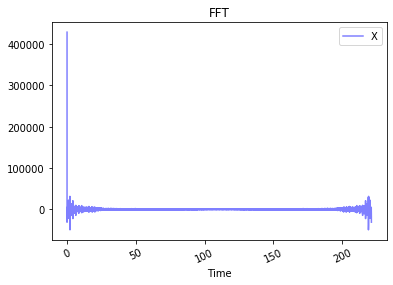

In [47]:
# fourier transform
fft_a = fft(data['aT (m/s^2)'])
f2 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], fft_a,'b', alpha=0.5, label="X") 
plt.xlabel('Time')
#plt.axis([-1, 2, -5, 35])
plt.ylabel('')
plt.title('FFT')
plt.legend()
plt.show()
#f2.savefig("figure1.png")